<h1>Bank Customer Churn Prediction</h1>
https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

______________________

<h4>Instalação e importação dos pacotes</h4>

In [89]:
import numpy as np #Processamento e análise de dados
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Conhecendo e fazendo análise exploratória dos dados</h4>

<h5>Leitura do arquivo e tratamento dos dados</h5>

In [40]:
df = pd.read_csv(filepath_or_buffer='churn.csv', header=0) #leitura do dataframe
df.head() #mostra os primeiros registros

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
#Renomear colunas
df.rename(
    columns={
        'CustomerId': 'IdCliente',
        'Surname': 'Nome',
        'Geography': 'Nacionalidade',
        'Gender': 'Genero',
        'Age': 'Idade',
        'Tenure':'TempoCliente',
        'Balance': 'SaldoConta',
        'NumOfProducts': 'QtdProdutos',
        'HasCrCard': 'TemCartao',
        'IsActiveMember': 'ClienteAtivo',
        'EstimatedSalary': 'SalarioEstimado',
        'Exited': 'Churn'
    },
    inplace=True
)
df.head()

,RowNumber,IdCliente,Nome,CreditScore,Nacionalidade,Genero,Idade,TempoCliente,SaldoConta,QtdProdutos,TemCartao,ClienteAtivo,SalarioEstimado,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h5>Análise exploratória</h5>

In [42]:
#Informações sobre o data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   IdCliente        10000 non-null  int64  
 2   Nome             10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Nacionalidade    10000 non-null  object 
 5   Genero           10000 non-null  object 
 6   Idade            10000 non-null  int64  
 7   TempoCliente     10000 non-null  int64  
 8   SaldoConta       10000 non-null  float64
 9   QtdProdutos      10000 non-null  int64  
 10  TemCartao        10000 non-null  int64  
 11  ClienteAtivo     10000 non-null  int64  
 12  SalarioEstimado  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
#Dados descritivos das colunas pivotados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
IdCliente,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Idade,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
TempoCliente,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
SaldoConta,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
QtdProdutos,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
TemCartao,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
ClienteAtivo,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
SalarioEstimado,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [44]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
Nome,10000,2932,Smith,32
Nacionalidade,10000,3,France,5014
Genero,10000,2,Male,5457


In [45]:
#dropando a coluna de nome de clientes
df.drop(['Nome'], axis=1, inplace=True)
df.head()

,RowNumber,IdCliente,CreditScore,Nacionalidade,Genero,Idade,TempoCliente,SaldoConta,QtdProdutos,TemCartao,ClienteAtivo,SalarioEstimado,Churn
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
IdCliente,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Idade,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
TempoCliente,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
SaldoConta,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
QtdProdutos,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
TemCartao,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
ClienteAtivo,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
SalarioEstimado,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [47]:
df.drop(['RowNumber', 'IdCliente'], axis=1, inplace=True)
df.head()

,CreditScore,Nacionalidade,Genero,Idade,TempoCliente,SaldoConta,QtdProdutos,TemCartao,ClienteAtivo,SalarioEstimado,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


_____

In [65]:
#Paleta de cores dos gráficos
sns.set_palette('colorblind')

Score de Crédito

In [49]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
#Gráfico - Score de Crédito
fig_score = go.Figure()
#Definição do tipo e dos dados do gráfico
fig_score.add_box(x = df['CreditScore'], name = 'Score', orientation = 'h')
#Definições de layout do gráfico
fig_score.update_layout(title = 'Score de Crédito')
fig_score.update_layout(height = 400, width = 600)
fig_score.update_layout(legend_title_text = 'Score de Crédito')
fig_score.show()


<Axes: xlabel='CreditScore'>

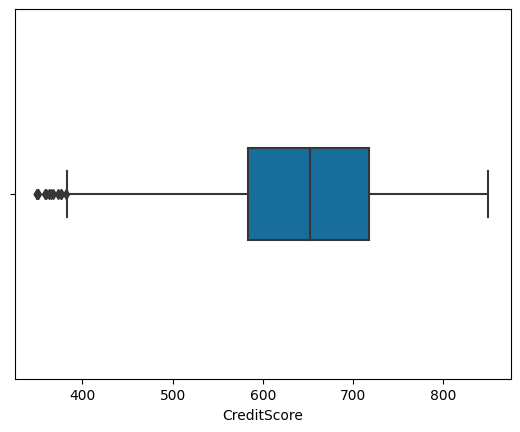

In [82]:
sns.boxplot(data=df, x='CreditScore', orient='h', width=0.25)

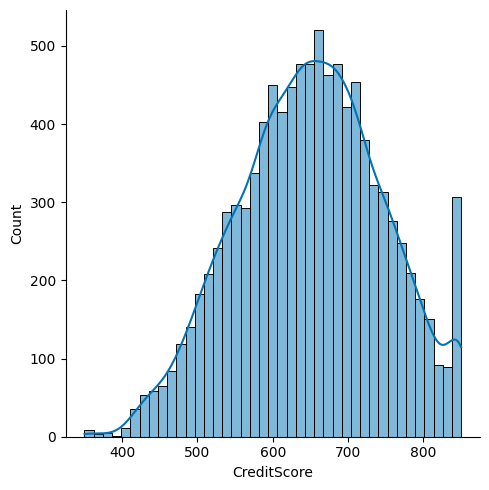

In [83]:
sns.displot(data=df, x='CreditScore', kind='hist', kde=True)

In [ ]:
df_pais = df['pais'].count()
df_pais

In [ ]:
df_pais

In [ ]:
#Gráfico - Clientes por país
fig_pais = px.pie(
    data_frame = df, 
    names = 'pais',
    title = 'Clientes por País',
    color = 'pais',
    color_discrete_map = {'France': 'cyan',
                          'Germany': 'royalblue',
                          'Spain': 'darkblue'},
    hole = .4
                )
fig_pais

In [ ]:
df.idade.describe()

In [ ]:
#Gráfico - Idade
fig_idade = px.box(
    data_frame = df, 
    x = 'idade',
    title = 'Idade'
    #,
    #notched = False,
    #hover_data = ['churn']
    )
fig_idade

In [ ]:
df.idade_abertura_cc.describe()

In [ ]:
#Gráfico - Tempo de abertura da conta
fig_idade_abertura_cc= px.box(
    data_frame = df, 
    x = 'idade_abertura_cc',
    title = 'Tempo de abertura da conta'
    )
fig_idade_abertura_cc

In [ ]:
df.saldo_cc.describe()

In [ ]:
#Gráfico - Saldo em Conta Corrente
fig_saldo_cc= px.box(
    data_frame = df, 
    x = 'saldo_cc',
    title = 'Saldo em Conta Corrente'
    )
fig_saldo_cc

In [ ]:
df.qtd_produtos.describe()

In [ ]:
df.qtd_produtos.value_counts()

In [ ]:
#Gráfico - Quantidade de Produtos
fig_qtd_produtos= px.box(
    data_frame = df, 
    x = 'qtd_produtos',
    title = 'Quantidade de Produtos'
    )
fig_qtd_produtos

In [ ]:
#Gráfico - Clientes por quantidade de produtos
fig_qtd_produtos_pie = px.pie(
    data_frame = df, 
    names = 'qtd_produtos',
    title = 'Clientes por quantidade de produtos',
    color = 'qtd_produtos',
    color_discrete_map = {1: 'cyan',
                          2: 'royalblue',
                          3: 'darkblue',
                          4: 'lightblue'},
    hole = .5
                )
fig_qtd_produtos_pie

Correlações

In [ ]:
df_corr = df.corr(method = 'pearson')

In [ ]:
import plotly.graph_objects as go

fig_corr = go.Figure(
    data = go.Heatmap(
        z = df_corr,
        x = df_corr.columns,
        y = df_corr.columns
    )
)

fig_corr.show()

In [ ]:
fig_corr_arred = px.imshow(
    round(df_corr, 2),
    text_auto = True,
    aspect = 'auto'
)

fig_corr_arred.show()

In [ ]:
#profile = ProfileReport(df_bank)
#profile.to_widgets()
#profile.to_file('bank_churn.html')
#profile.to_notebook_iframe()

In [ ]:
df['pais'].unique()
#df_bank['pais'].nunique()

In [ ]:
#ver as colunas do data frame
df.columns
#ver a quantidade de linhas
df.index
#mostrar estatísticas rápidas do data frame
df.describe()
#pivotar o data frame
df.T
#monstrando o data frame ordenado pelas colunas crescentes
df.sort_index(axis = 1, ascending = True)
#mostrando o data frame ordenado por uma coluna
df.sort_values(by = 'churn')
#mostrando 5 primeiras linhas e 2 colunas específicas
df.loc[0:5:, ['ativo', 'idade']]
#mostrar 3 primeiras linhas e todas as colunas
df.iloc[0:3, :]
#mostrar uma posição específica
df.iloc[0]



In [ ]:
app = Dash(__name__)

fig = px.box(data_frame = df, x = 'score_de_credito')

app.layout = html.Div(children = [
        html.H1(children = 'Score de Crédito'),
    
dcc.Graph(id = 'example-graph', figure = fig)
]
)
if __name__ == '__main__':
    app.run_server(debug=True)